In [1]:
#importing required python libraries and matplotlib for plotting and visualizing
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [4]:
def throwCoin(N):
    return np.random.choice(['H','T'], size=N)
throws=throwCoin(40)
print("Throws:"," ".join(throws))
print("Number of Heads:", np.sum(throws=='H'))
print("probability p1 of getting a head", np.sum(throws=='H')/40)

Throws: T T T T H T H H H H H T T H H H H H T H T T H T H T T H T H T H H H T H H T T H
Number of Heads: 22
probability p1 of getting a head 0.55


In [8]:
#the coins will be at random and will change for every call of the function
throws=throwCoin(40)
print("Throws:"," ".join(throws))
print("Number of Heads:", np.sum(throws=='H'))
print("probability p of getting a head", np.sum(throws=='H')/40)

Throws: H H H T H T T H T T H H H T H T T T T T T T T H T T H T H T T T T T H T T T T T
Number of Heads: 13
probability p of getting a head 0.325


In [13]:
#more number of flips
throws=throwCoin(10000)
print("Throws for first 1000 flips"," ".join(throws)[:1000])
print("Number of Heads:", np.sum(throws=='H'))
print("probability p of getting a head", np.sum(throws=='H')/10000)

Throws for first 1000 flips T H T H T H T T T T H H T H H H T H H H T H T H T T H H T H H H H H T T H T H T T T H T T H T T T T T H T H T H H H T T H H H T H H T T T T H H T H H H H T H H T T H T T T H T H H T H H T T T T H H H H T T H H H T T T H H H T H H H H T T T H H T H H T T H T H H H H H T H H H H H H H H H T H T H H H H H T T T T H H H T T H H H T T T T H H T H H H H T H H H H T H H H T T H H H T H T H H H H T T H T T T T T T H T T T H H H T H H H H T T H T H T T T T H H H T H H H T T T T T H T H T T T H H T T T T H H H H T T H H H H T T T T H T H T H H H H T T T T H T T T H H T H T T T H H T T H T H H H T H H H H T H T H T T T H H T H T H H T H H T T H H H T H H H H T H H H H H T T H T T H T T T T T T H H T T T T T H T T T H H T T T H T T T T T H H H H H T T H H T H H H H H T T H T T T H T H T H H H T H H T H T H T H T T H H H H T H T H H H H H H H T H T T H H T T T H T H H H H H T H T H H T H H T H H T H T T H T H H T H T T H T H H T T H H T H T T T T H T H H H T H T H T T H 

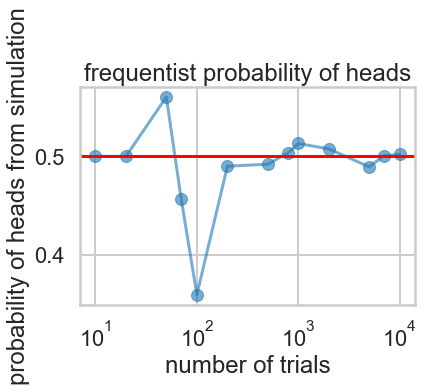

In [15]:
trials=[10, 20, 50, 70, 100, 200, 500, 800, 1000, 2000, 5000, 7000, 10000]
plt.plot(trials, [np.sum(throwCoin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6);
plt.xscale("log")
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

In [16]:
predictwise = pd.read_csv('predictwise.csv').set_index('States')
predictwise

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55
Colorado,0.807,0.193,9
Connecticut,1.000,0.000,7
Delaware,1.000,0.000,3
District of Columbia,1.000,0.000,3


In [17]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obamaVotes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obamaVotes.sum(axis=0)

In [19]:
result = simulate_election(predictwise, 10000)
print((result >= 269).sum())

9961


In [20]:
result

array([326, 281, 326, ..., 290, 325, 317], dtype=int64)

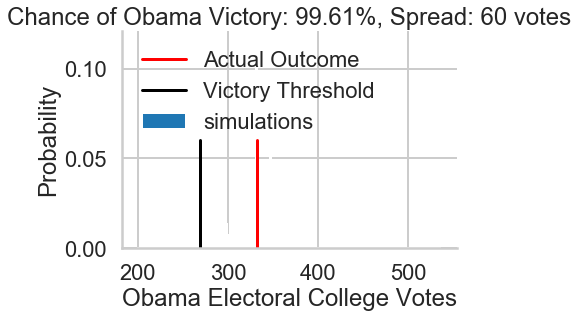

In [22]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', density=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()
plot_simulation(result)

In [25]:
#bernoulli random variable
from scipy.stats import bernoulli
brv=bernoulli(p=0.3)
brv.rvs(size=20)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

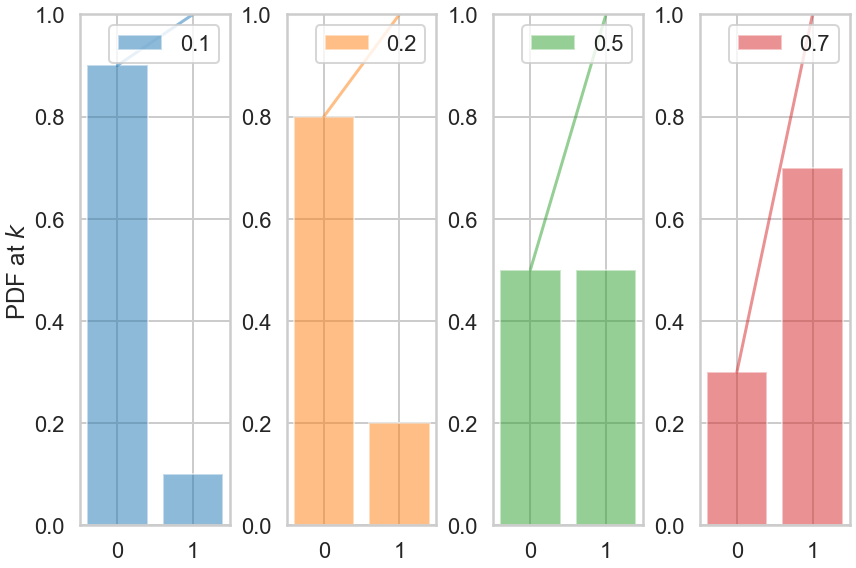

In [26]:
event_space=[0,1]
plt.figure(figsize=(12,8))
colors=sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    plt.plot(event_space, bernoulli.cdf(event_space, p), color=colors[i], alpha=0.5)

    ax.xaxis.set_ticks(event_space)
   
    plt.ylim((0,1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
plt.tight_layout()

In [28]:
#emperical distribution
CDF = lambda x: np.float(np.sum(result < x))/result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print("Obama Win CDF at votes=", votes, " is ", CDF(votes))

Obama Win CDF at votes= 200  is  0.0
Obama Win CDF at votes= 300  is  0.1463
Obama Win CDF at votes= 320  is  0.4502
Obama Win CDF at votes= 340  is  0.8407
Obama Win CDF at votes= 360  is  0.997
Obama Win CDF at votes= 400  is  1.0
Obama Win CDF at votes= 500  is  1.0


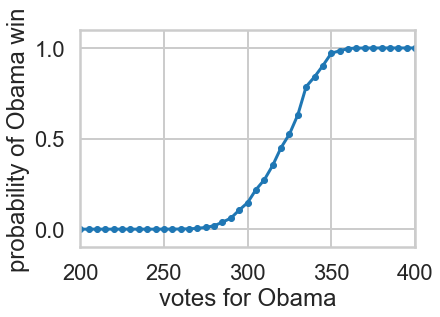

In [29]:
votelist=np.arange(0, 540, 5)
plt.plot(votelist, [CDF(v) for v in votelist], '.-');
plt.xlim([200,400])
plt.ylim([-0.1,1.1])
plt.xlabel("votes for Obama")
plt.ylabel("probability of Obama win");

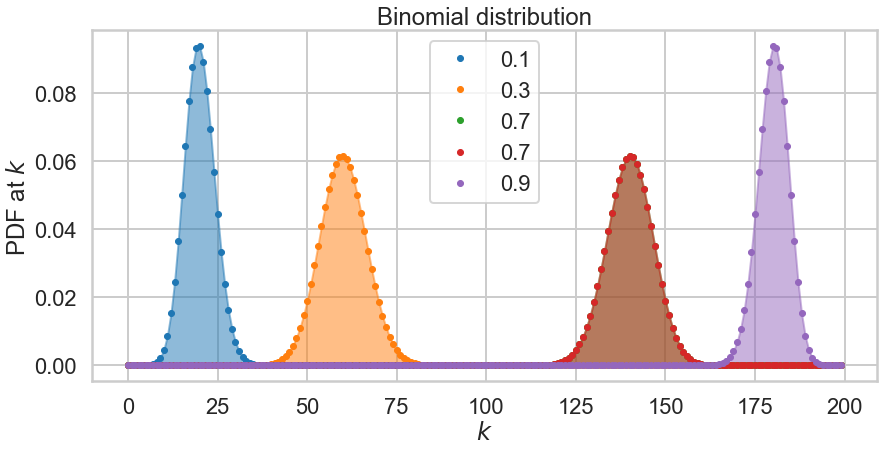

In [31]:
#binomial distribution
from scipy.stats import binom
plt.figure(figsize=(12,6))
k = np.arange(0, 200)
for p, color in zip([0.1, 0.3, 0.7, 0.7, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")